In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [2]:

X, Y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.6,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
)


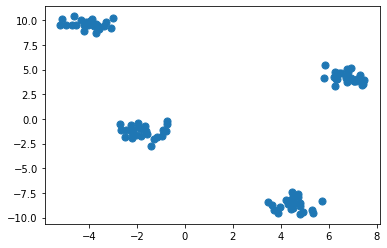

In [3]:
plt.scatter(X[:,0], X[:,1], s=50)

In [4]:
from sklearn.cluster import KMeans

In [5]:
k_means =KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
)

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_means = k_means.predict(X)

In [8]:
k_means.cluster_centers_

array([[-4.02009316,  9.62254723],
       [-1.74843645, -1.25560456],
       [ 6.70739438,  4.25324367],
       [ 4.49336491, -8.63953953]])

In [9]:
k_means.labels_

array([1, 2, 3, 0, 3, 2, 3, 0, 0, 0, 1, 1, 0, 2, 2, 3, 0, 3, 3, 0, 2, 1,
       2, 2, 2, 0, 3, 2, 0, 3, 3, 1, 1, 0, 1, 1, 3, 3, 0, 1, 1, 0, 1, 3,
       1, 2, 1, 1, 2, 1, 3, 0, 2, 2, 3, 3, 0, 1, 0, 1, 0, 1, 2, 2, 2, 3,
       2, 1, 1, 0, 2, 0, 3, 0, 3, 1, 3, 2, 3, 0, 1, 2, 2, 2, 0, 2, 1, 0,
       3, 1, 3, 1, 0, 0, 3, 3, 2, 2, 0, 3], dtype=int32)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(X, Y,test_size=0.3)
Y_train

array([3, 2, 0, 0, 3, 2, 3, 3, 1, 1, 3, 2, 0, 2, 0, 3, 3, 3, 0, 1, 0, 1,
       2, 2, 2, 3, 1, 3, 3, 1, 0, 1, 0, 1, 3, 1, 2, 1, 1, 2, 0, 1, 2, 0,
       2, 0, 1, 1, 2, 1, 0, 1, 3, 2, 0, 2, 3, 3, 3, 2, 2, 0, 3, 3, 1, 0,
       3, 0, 2, 2])

In [11]:
k_means.fit(X_train)
labels = k_means.predict(X_train)
labels_Ytest = k_means.predict(X_test)

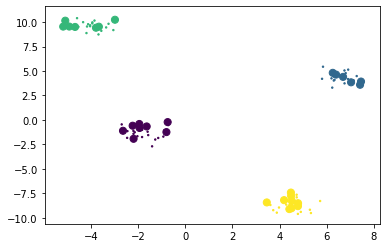

In [12]:
plt.scatter(X_train[:,0], X_train[:,1],c = labels, s= 2)
plt.scatter(X_test[:,0], X_test[:,1],c = labels_Ytest, s= 50)


In [13]:
labels

array([1, 2, 3, 3, 1, 2, 1, 1, 0, 0, 1, 2, 3, 2, 3, 1, 1, 1, 3, 0, 3, 0,
       2, 2, 2, 1, 0, 1, 1, 0, 3, 0, 3, 0, 1, 0, 2, 0, 0, 2, 3, 0, 2, 3,
       2, 3, 0, 0, 2, 0, 3, 0, 1, 2, 3, 2, 1, 1, 1, 2, 2, 3, 1, 1, 0, 3,
       1, 3, 2, 2], dtype=int32)

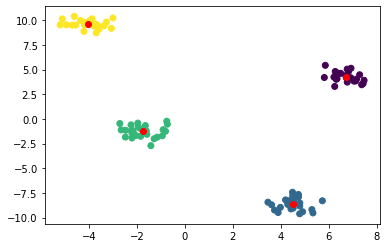

In [19]:
## Manual Implementation

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, num_clusters):
    

    random_initialization = np.random.RandomState(5)
    indexes = random_initialization.permutation(X.shape[0])[:num_clusters]

    cluster_centroids = X[indexes]
    while True: 
        labels = pairwise_distances_argmin(X,cluster_centroids)
        newLabels = np.array([X[labels == i].mean(0) for i in range(num_clusters)])
        if np.all(newLabels == cluster_centroids):
            break
        cluster_centroids = newLabels
    return cluster_centroids, labels


centroid, labels = find_clusters(X, 4)
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centroid[:,0], centroid[:,1], color='red')